# Round 1

Import the required libraries and modules that you would need.

In [5]:
import pandas as pd
## plotting libraries
from matplotlib import pyplot as plt
## Sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline

Read that data into Python and call the dataframe churnData.

In [6]:
churn_data = pd.read_csv('DATA_Customer-Churn.csv')

Check the datatypes of all the columns in the data. You will see that the column TotalCharges is object type. Convert this column into numeric type using pd.to_numeric function.

In [7]:
churn_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [8]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [9]:
churn_data["TotalCharges"] = pd.to_numeric(churn_data["TotalCharges"], errors='coerce')
churn_data["TotalCharges"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7032 non-null   float64
dtypes: float64(1)
memory usage: 55.1 KB


Check for null values in the dataframe. Replace the null values.

In [10]:
pd.isna(churn_data).sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
total_charges_mean = churn_data["TotalCharges"].mean()
churn_data["TotalCharges"] = churn_data["TotalCharges"].fillna(total_charges_mean)
pd.isna(churn_data).sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:
- Split the data into a training set and a test set.
- Scale the features either by using normalizer or a standard scaler.
- (optional)Fit a logistic Regression model on the training data.
- Fit a Knn Classifier(NOT KnnRegressor please!)model on the training data.

In [12]:
churn_data_num = churn_data.select_dtypes(include='number')
churn_data_num

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


Split the data into a training set and a test set.

In [13]:
TT_SPLIT = 0.2     # ratio train/test size
RAND_STATE = 123   # specifies a sampling for repeatable results

In [14]:
y = churn_data['Churn'].replace({'Yes':'1','No':'0'})
X = churn_data_num
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: object

In [15]:
y = y.astype(int)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TT_SPLIT, random_state=RAND_STATE)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
6924,0,1,69.35,69.35
5249,0,72,67.20,4671.70
5852,1,21,69.10,1474.75
3597,0,25,95.70,2338.35
4147,1,71,24.85,1901.00


Scale the features either by using normalizer or a standard scaler.

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [18]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,-0.437749,-1.286047,0.155909,-0.983513
1,-0.437749,1.609041,0.084358,1.057616
2,2.284413,-0.470529,0.147589,-0.360222
3,-0.437749,-0.307426,1.032822,0.022782
4,2.284413,1.568265,-1.325026,-0.171182
...,...,...,...,...
5629,-0.437749,-1.326823,-1.496415,-0.001633
5630,-0.437749,0.875075,-0.043768,0.497656
5631,-0.437749,-0.755961,0.751611,-0.456084
5632,2.284413,-0.144322,-0.965608,-0.559619


In [19]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_test_scaled

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,-0.437749,-0.796737,-1.148645,-0.844765
1,-0.437749,0.100333,-1.376609,-0.660758
2,-0.437749,-0.592857,-1.508063,-0.877118
3,-0.437749,0.426540,0.355586,0.387802
4,-0.437749,0.752747,-1.464800,-0.561570
...,...,...,...,...
1404,-0.437749,-1.286047,0.415489,-0.980054
1405,-0.437749,-1.286047,-1.509727,-1.005710
1406,-0.437749,-1.082168,0.688380,-0.797200
1407,-0.437749,1.364385,-0.333299,0.596512


Fit a Knn Classifier(NOT KnnRegressor please!)model on the training data.

In [20]:
def evaluator_kn_classifier (n):
    model = KNeighborsClassifier(n_neighbors=n,weights='uniform') # declare we're using knn classification model
    model.fit(X_train_scaled, y_train) # train model
    y_pred_test = model.predict(X_test_scaled) # predict test
    y_pred_train=model.predict(X_train_scaled) # predict train (for sanity checks)
        
    performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                            'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                            'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test),
                                        recall_score(y_test, y_pred_test)]})
        
    return performance_df

In [21]:
evaluator_kn_classifier(15)

,Error_metric,Train,Test
0,Accuracy,0.812567,0.779276
1,Precision,0.688909,0.642612
2,Recall,0.517966,0.474619


In [22]:
for i in range(1,16):
    print("Error metrics for Knn model with n = ", i)
    display(evaluator_kn_classifier(i))

Error metrics for Knn model with n =  1


,Error_metric,Train,Test
0,Accuracy,0.989350,0.740951
1,Precision,0.981620,0.539295
2,Recall,0.977627,0.505076


Error metrics for Knn model with n =  2


,Error_metric,Train,Test
0,Accuracy,0.863862,0.763662
1,Precision,0.988950,0.659686
2,Recall,0.485424,0.319797


Error metrics for Knn model with n =  3


,Error_metric,Train,Test
0,Accuracy,0.861022,0.760114
1,Precision,0.772013,0.585366
2,Recall,0.665763,0.487310


Error metrics for Knn model with n =  4


,Error_metric,Train,Test
0,Accuracy,0.838658,0.773598
1,Precision,0.825287,0.656904
2,Recall,0.486780,0.398477


Error metrics for Knn model with n =  5


,Error_metric,Train,Test
0,Accuracy,0.835286,0.775727
1,Precision,0.728488,0.617470
2,Recall,0.591186,0.520305


Error metrics for Knn model with n =  6


,Error_metric,Train,Test
0,Accuracy,0.828541,0.777147
1,Precision,0.771612,0.650376
2,Recall,0.490169,0.439086


Error metrics for Knn model with n =  7


,Error_metric,Train,Test
0,Accuracy,0.827831,0.775727
1,Precision,0.718237,0.624204
2,Recall,0.563390,0.497462


Error metrics for Knn model with n =  8


,Error_metric,Train,Test
0,Accuracy,0.822151,0.780696
1,Precision,0.749736,0.666667
2,Recall,0.481356,0.431472


Error metrics for Knn model with n =  9


,Error_metric,Train,Test
0,Accuracy,0.822861,0.777147
1,Precision,0.708297,0.629870
2,Recall,0.549831,0.492386


Error metrics for Knn model with n =  10


,Error_metric,Train,Test
0,Accuracy,0.820199,0.787083
1,Precision,0.737654,0.686508
2,Recall,0.486102,0.439086


Error metrics for Knn model with n =  11


,Error_metric,Train,Test
0,Accuracy,0.817536,0.783534
1,Precision,0.702629,0.648829
2,Recall,0.525424,0.492386


Error metrics for Knn model with n =  12


,Error_metric,Train,Test
0,Accuracy,0.812744,0.784954
1,Precision,0.716049,0.675676
2,Recall,0.471864,0.444162


Error metrics for Knn model with n =  13


,Error_metric,Train,Test
0,Accuracy,0.813987,0.777147
1,Precision,0.692169,0.635135
2,Recall,0.521356,0.477157


Error metrics for Knn model with n =  14


,Error_metric,Train,Test
0,Accuracy,0.810792,0.777857
1,Precision,0.705942,0.658824
2,Recall,0.475254,0.426396


Error metrics for Knn model with n =  15


,Error_metric,Train,Test
0,Accuracy,0.812567,0.779276
1,Precision,0.688909,0.642612
2,Recall,0.517966,0.474619


##### Answer: 
The best results are with 10 neighbors, that gives 0.79 in accuracy.

### (optional)Fit a logistic Regression model on the training data.

,Error_metric,Train,Test
0,Accuracy,0.793042,0.781405
1,Precision,0.657172,0.672000
2,Recall,0.437966,0.426396


Confusion matrix for the train set
[[3822  337]
 [ 829  646]]


Confusion matrix for the test set
[[933  82]
 [226 168]]


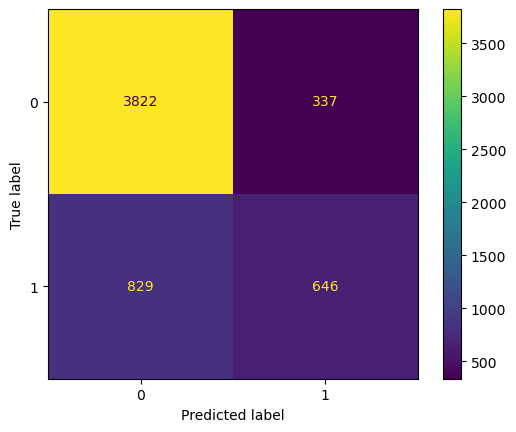

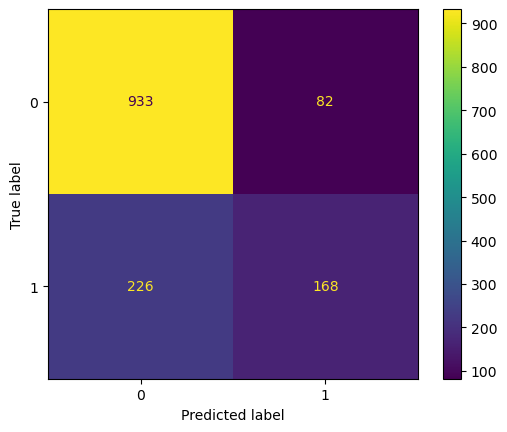

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix


log_model = LogisticRegression() 


#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

trans = PowerTransformer()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

log_model.fit(X_train_mod, y_train)

y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')


print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')


# Round 2

- Fit a Decision Tree Classifier on the training data.
- Check the accuracy on the test data.

In [24]:
def evaluator_dt_classifier (n):
    model = DecisionTreeClassifier(max_depth=n)

    model.fit(X_train, y_train)

    y_pred_train_dt = model.predict(X_train)
    y_pred_test_dt = model.predict(X_test)


    performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

    return performance_df

In [25]:
evaluator_dt_classifier (3)

,Error_metric,Train,Test
0,Accuracy,0.786475,0.771469
1,Precision,0.643158,0.638462
2,Recall,0.414237,0.421320


In [26]:
for i in range(1,9):
    print("Error metrics for DT model with n = ", i)
    display(evaluator_dt_classifier(i))

Error metrics for DT model with n =  1


/Users/angelicablancogarcia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/angelicablancogarcia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Error_metric,Train,Test
0,Accuracy,0.738197,0.720369
1,Precision,0.000000,0.000000
2,Recall,0.000000,0.000000


Error metrics for DT model with n =  2


,Error_metric,Train,Test
0,Accuracy,0.786475,0.771469
1,Precision,0.643158,0.638462
2,Recall,0.414237,0.421320


Error metrics for DT model with n =  3


,Error_metric,Train,Test
0,Accuracy,0.786475,0.771469
1,Precision,0.643158,0.638462
2,Recall,0.414237,0.421320


Error metrics for DT model with n =  4


,Error_metric,Train,Test
0,Accuracy,0.790735,0.773598
1,Precision,0.667800,0.665198
2,Recall,0.399322,0.383249


Error metrics for DT model with n =  5


,Error_metric,Train,Test
0,Accuracy,0.801207,0.775018
1,Precision,0.676617,0.649805
2,Recall,0.461017,0.423858


Error metrics for DT model with n =  6


,Error_metric,Train,Test
0,Accuracy,0.805644,0.769340
1,Precision,0.678571,0.621908
2,Recall,0.489492,0.446701


Error metrics for DT model with n =  7


,Error_metric,Train,Test
0,Accuracy,0.814164,0.766501
1,Precision,0.689716,0.604502
2,Recall,0.527458,0.477157


Error metrics for DT model with n =  8


,Error_metric,Train,Test
0,Accuracy,0.828186,0.766501
1,Precision,0.712134,0.600000
2,Recall,0.576949,0.494924


In [27]:
y_train.value_counts()

0    4159
1    1475
Name: Churn, dtype: int64

### Comparing Decision Tress, Logistic Regression and KNN Classification Models

Still the best results based on accuracy are with KNN = 10 regression with 0,79 in accuracy for the test data set.

# Round 3

- apply K-fold cross validation on your models before and check the model score. Note: So far we have not balanced the data.

In [28]:
y_train.value_counts() # checking the imbalance in the train dataset

0    4159
1    1475
Name: Churn, dtype: int64

#### SMOTE Upsampling

In [29]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [30]:
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
y_train_sm.value_counts()

1    4159
0    4159
Name: Churn, dtype: int64

#### Scaling the data

In [31]:
X_train_sm_scaled = scaler.fit_transform(X_train_sm)
X_train_sm_scaled = pd.DataFrame(X_train_sm_scaled, columns=X_train_sm.columns)
X_train_sm_scaled

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,-0.396899,-1.111374,0.048496,-0.907699
1,-0.396899,1.849587,-0.026580,1.206296
2,2.519535,-0.277301,0.039766,-0.262157
3,-0.396899,-0.110486,0.968620,0.134519
4,2.519535,1.807883,-1.505414,-0.066368
...,...,...,...,...
8313,-0.396899,-0.652634,-0.708616,-0.664029
8314,-0.396899,-1.069671,0.084302,-0.875705
8315,-0.396899,-0.694338,1.054524,-0.452707
8316,-0.396899,-0.485819,0.950123,-0.225513


#### Runing KN classification model with upsampled train data

In [32]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [36]:
model1 = DecisionTreeClassifier()
model2 = LogisticRegression()
model3 = KNeighborsClassifier()

model_pipeline = [model1, model2, model3]
model_names = ['Classification Tree', 'Logistic Regression', 'KNN']
scores = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_train_sm, y_train_sm, cv=5))
    scores[model_names[i]] = mean_score
    i = i+1
print(scores)

{'Classification Tree': 0.7439362510985708, 'Logistic Regression': 0.7295035616818539, 'KNN': 0.7735064497664093}


In [37]:
model1 = DecisionTreeClassifier()
model2 = LogisticRegression()
model3 = KNeighborsClassifier()

model_pipeline = [model1, model2, model3]
model_names = ['Classification Tree', 'Logistic Regression', 'KNN']
scores = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_train, y_train, cv=5))
    scores[model_names[i]] = mean_score
    i = i+1
print(scores)

{'Classification Tree': 0.7163638827992391, 'Logistic Regression': 0.7891396546262339, 'KNN': 0.7690818454186833}


In [46]:
y_pred_cv_dt = cross_val_predict(model1, X_train, y_train, cv=5)
y_pred_cv_lr = cross_val_predict(model2, X_train, y_train, cv=5)
y_pred_cv_kn = cross_val_predict(model3, X_train, y_train, cv=5)

In [48]:
precision_dt = precision_score(y_train, y_pred_cv_dt)
recall_dt = recall_score(y_train, y_pred_cv_dt)
precision_lr = precision_score(y_train, y_pred_cv_lr)
recall_lr = recall_score(y_train, y_pred_cv_lr)
precision_knn = precision_score(y_train, y_pred_cv_kn)
recall_knn = recall_score(y_train, y_pred_cv_kn)
print ("precision_cv_dt", precision_dt, "recall_cv_dt", recall_dt)
print ("precision_cv_lr", precision_lr, "recall_cv_lr", recall_lr)
print ("precision_cv_knn", precision_lr, "recall_cv_knn", recall_lr)

precision_cv_dt 0.4610738255033557 recall_cv_dt 0.46576271186440676
precision_cv_lr 0.6327474560592045 recall_cv_lr 0.46372881355932205
precision_cv_knn 0.6327474560592045 recall_cv_knn 0.46372881355932205


In [67]:
y_pred_cv_dt_sm = cross_val_predict(model1, X_train_sm, y_train_sm, cv=5)
y_pred_cv_lr_sm = cross_val_predict(model2, X_train_sm, y_train_sm, cv=5)
y_pred_cv_kn_sm = cross_val_predict(model3, X_train_sm, y_train_sm, cv=5)

In [56]:
y_accuracy_cv_dt_sm = cross_val_score(model1, X_test, y_test, cv=5)
y_accuracy_cv_lr_sm = cross_val_score(model2, X_test, y_test, cv=5)
y_accuracy_cv_kn_sm = cross_val_score(model3, X_test, y_test, cv=5)

In [63]:
import statistics as s

In [64]:
print(s.mean(y_pred_cv_dt_sm))
print(s.mean(y_pred_cv_lr_sm))
print(s.mean(y_pred_cv_kn_sm))

0.6941318997501325
0.7792635218697156
0.7317306478887459


In [69]:
# How to compare the recall and precision from upsampled and unbalanced data set?
precision_dt_sm = precision_score(y_train_sm, y_pred_cv_dt_sm)
recall_dt_sm = recall_score(y_train_sm, y_pred_cv_dt_sm)
precision_lr_sm = precision_score(y_train_sm, y_pred_cv_lr_sm)
recall_lr_sm = recall_score(y_train_sm, y_pred_cv_lr_sm)
precision_knn_sm = precision_score(y_train_sm, y_pred_cv_kn_sm)
recall_knn_sm = recall_score(y_train_sm, y_pred_cv_kn_sm)
print ("precision_cv_dt", precision_dt_sm, "recall_cv_dt", recall_dt_sm)
print ("precision_cv_lr", precision_lr_sm, "recall_cv_lr", recall_lr_sm)
print ("precision_cv_knn", precision_lr_sm, "recall_cv_knn", recall_lr_sm)

precision_cv_dt 0.736780258519389 recall_cv_dt 0.753786968021159
precision_cv_lr 0.710939226519337 recall_cv_lr 0.7735032459725896
precision_cv_knn 0.710939226519337 recall_cv_knn 0.7735032459725896
